### Creating Loan Prediction Model


In [1]:
#step1 : import librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',100)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [2]:
#reading the data

train = pd.read_csv("E:\prjct\loan prediction/train.csv")
test = pd.read_csv("E:\prjct\loan prediction/test.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train.shape

(614, 13)

In [6]:
#printing the column has null

nullc=[i for i in train if train[i].isnull().sum()>0]

In [7]:
nullc

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [8]:
for i in train:
    if train[i].isnull().sum()>0:
        print(i,train[i].isnull().sum())

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


In [9]:
#checking null column 45% above exist, if exist then drop it

nullperc=train.apply(lambda train : np.round(train.isnull().sum()/train.shape[0]*100,2))

In [10]:
nullperc

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [11]:
nullcount=train.isnull().sum()

In [12]:
table=pd.DataFrame([nullcount,nullperc]).T

In [13]:
table

,0,1
Loan_ID,0.0,0.00
Gender,13.0,2.12
Married,3.0,0.49
Dependents,15.0,2.44
Education,0.0,0.00
Self_Employed,32.0,5.21
ApplicantIncome,0.0,0.00
CoapplicantIncome,0.0,0.00
LoanAmount,22.0,3.58
Loan_Amount_Term,14.0,2.28


In [14]:
table.columns=['nullcount','nullperc']

In [15]:
table

,nullcount,nullperc
Loan_ID,0.0,0.00
Gender,13.0,2.12
Married,3.0,0.49
Dependents,15.0,2.44
Education,0.0,0.00
Self_Employed,32.0,5.21
ApplicantIncome,0.0,0.00
CoapplicantIncome,0.0,0.00
LoanAmount,22.0,3.58
Loan_Amount_Term,14.0,2.28


In [16]:
# since there is no column here show above 45% perc so no drooping
# if any column show more than 45 % u must drop it else fillna value will shootup

In [17]:
# checking is there any duplicated column exist or not
train.duplicated().sum()

0

**Handling the missing value**

In [18]:
for i in train:
    if train[i].dtype=='object':
        train[i].fillna(train[i].mode()[0] ,inplace =True)
    else:
        train[i].fillna(train[i].median(),inplace=True)

In [19]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
#slicing numerical column from train data set for plotting

numc=train.select_dtypes(np.number).columns

In [22]:
numc

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

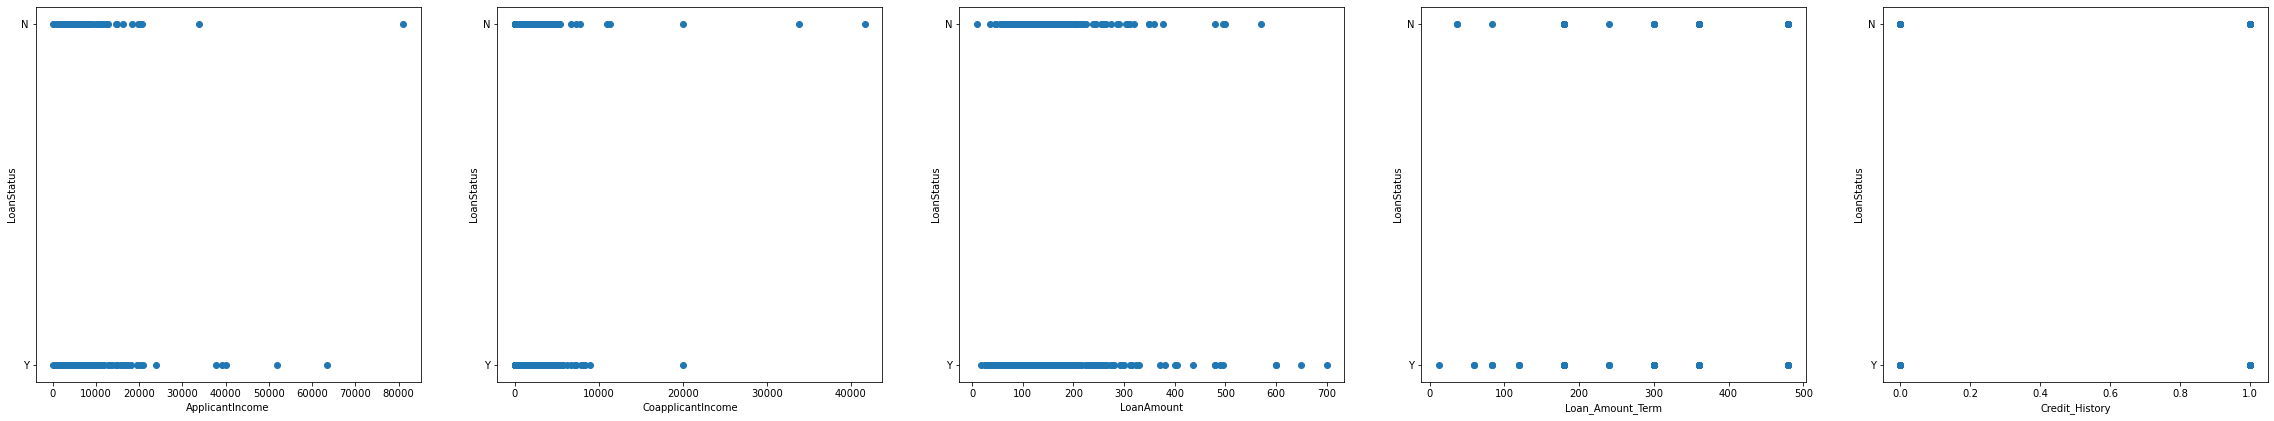

In [23]:
#plotinng numerical column based on output column
j=0
plt.figure(figsize=(40,40))
for i in numc:
    plt.subplot(5,5,j+1)
    plt.scatter(train[i],train["Loan_Status"])
    plt.xlabel(i)
    plt.ylabel('LoanStatus')
    j+=1

**Handling The Outlayer**

In [24]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [25]:
# for handling the outlayer i using capping method
# mainly continus column has oulayer

In [26]:
#slicing continues column from numerical column
conc=[]
disc=[]
for i in numc:
    if train[i].nunique()>20:
        conc.append(i)
    else:
        disc.append(i)


In [27]:
conc

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [28]:
train['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [29]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [30]:
#capping min and max of column with  upper limit and lower limit to handle outlayer
for i in conc:
    upp_lim=train[i].mean()+3*train[i].std()
    low_lim=train[i].mean()-3*train[i].std()

    train.loc[(train[i]>upp_lim),i]=upp_lim
    train.loc[(train[i]<low_lim),i]=low_lim


In [31]:
#now lets check it capped or not

train['ApplicantIncome'].describe()

count      614.000000
mean      5109.046701
std       3990.938759
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      23730.584304
Name: ApplicantIncome, dtype: float64

In [32]:
# so in above yo can see the outlayer in apllicant income column due to max value
#now after capping the max vallue is cap to upp_limit

In [33]:
train['LoanAmount'].describe()

count    614.000000
mean     142.803114
std       71.021485
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      398.074143
Name: LoanAmount, dtype: float64

**Categorical encoding**

In [34]:
#step1 slicing object column from the main table
objc= train.select_dtypes(np.object).columns

In [35]:
objc

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
trainobjc=train[objc]

In [37]:
trainobjc

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [38]:
from collections import defaultdict

defaultEncoder = defaultdict(LabelEncoder)

ob = trainobjc.apply(lambda x: defaultEncoder[x.name].fit_transform(x))

In [39]:
ob

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,1
610,610,1,1,3,0,0,0,1
611,611,1,1,1,0,0,2,1
612,612,1,1,2,0,0,2,1


In [40]:
# now we have succefully encoded


**concating numerical and object column in new table**

In [41]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [42]:
#dropping object column from train and after we concat with new table

In [43]:
train.drop(objc,axis=1,inplace=True)

In [44]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [45]:
data=pd.concat([train,ob],axis=1)

In [46]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,128.0,360.0,1.0,0,1,0,0,0,0,2,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,1,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,2,1,1,0,0,1,2,1
3,2583.0,2358.0,120.0,360.0,1.0,3,1,1,0,1,0,2,1
4,6000.0,0.0,141.0,360.0,1.0,4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,609,0,0,0,0,0,0,1
610,4106.0,0.0,40.0,180.0,1.0,610,1,1,3,0,0,0,1
611,8072.0,240.0,253.0,360.0,1.0,611,1,1,1,0,0,2,1
612,7583.0,0.0,187.0,360.0,1.0,612,1,1,2,0,0,2,1


**Correlation**

In [47]:
corrc=abs(data.corr()['Loan_Status'])


In [48]:
corrc

ApplicantIncome      0.002356
CoapplicantIncome    0.013085
LoanAmount           0.044956
Loan_Amount_Term     0.022549
Credit_History       0.540556
Loan_ID              0.011773
Gender               0.017987
Married              0.091478
Dependents           0.010118
Education            0.085884
Self_Employed        0.003700
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [49]:
df=data[['ApplicantIncome','LoanAmount','Credit_History','Married','Education','Self_Employed','Loan_Status']]

In [50]:
df

,ApplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed,Loan_Status
0,5849.0,128.0,1.0,0,0,0,1
1,4583.0,128.0,1.0,1,0,0,0
2,3000.0,66.0,1.0,1,0,1,1
3,2583.0,120.0,1.0,1,1,0,1
4,6000.0,141.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...
609,2900.0,71.0,1.0,0,0,0,1
610,4106.0,40.0,1.0,1,0,0,1
611,8072.0,253.0,1.0,1,0,0,1
612,7583.0,187.0,1.0,1,0,0,1


In [51]:
df

,ApplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed,Loan_Status
0,5849.0,128.0,1.0,0,0,0,1
1,4583.0,128.0,1.0,1,0,0,0
2,3000.0,66.0,1.0,1,0,1,1
3,2583.0,120.0,1.0,1,1,0,1
4,6000.0,141.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...
609,2900.0,71.0,1.0,0,0,0,1
610,4106.0,40.0,1.0,1,0,0,1
611,8072.0,253.0,1.0,1,0,0,1
612,7583.0,187.0,1.0,1,0,0,1


In [52]:
#in here only credit history has correlation value grater than 0.4
#since i want to drop majority column this time i am not going to drop it let all column stay

**ML**

### Train Test Split

In [53]:
#storing independt column in x and dependent column y

In [54]:
x=df.drop(['Loan_Status'],axis=1)

In [55]:
x

,ApplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed
0,5849.0,128.0,1.0,0,0,0
1,4583.0,128.0,1.0,1,0,0
2,3000.0,66.0,1.0,1,0,1
3,2583.0,120.0,1.0,1,1,0
4,6000.0,141.0,1.0,0,0,0
...,...,...,...,...,...,...
609,2900.0,71.0,1.0,0,0,0
610,4106.0,40.0,1.0,1,0,0
611,8072.0,253.0,1.0,1,0,0
612,7583.0,187.0,1.0,1,0,0


In [56]:
y=data['Loan_Status']

In [57]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=44)

In [59]:
X_train

,ApplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed
376,8750.0,130.0,1.0,1,0,0
232,3189.0,120.0,1.0,0,1,0
574,6406.0,150.0,1.0,1,0,0
30,4166.0,201.0,1.0,1,0,0
149,4860.0,125.0,1.0,1,0,0
...,...,...,...,...,...,...
84,3988.0,50.0,1.0,1,0,0
96,2484.0,137.0,1.0,1,0,0
571,5116.0,165.0,0.0,1,0,0
173,5708.0,187.0,1.0,1,0,0


#### Scaling Down

In [60]:
sc=StandardScaler()

In [61]:
X_train=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [62]:
X_train

,ApplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed
0,0.905520,-0.173666,0.403239,0.714537,-0.511629,-0.375443
1,-0.499454,-0.319704,0.403239,-1.399507,1.954540,-0.375443
2,0.313314,0.118410,0.403239,0.714537,-0.511629,-0.375443
3,-0.252617,0.863204,0.403239,0.714537,-0.511629,-0.375443
4,-0.077280,-0.246685,0.403239,0.714537,-0.511629,-0.375443
...,...,...,...,...,...,...
424,-0.297589,-1.341970,0.403239,0.714537,-0.511629,-0.375443
425,-0.677571,-0.071439,0.403239,0.714537,-0.511629,-0.375443
426,-0.012602,0.337467,-2.479919,0.714537,-0.511629,-0.375443
427,0.136966,0.658751,0.403239,0.714537,-0.511629,-0.375443


In [63]:
sc.mean_

array([5.16587900e+03, 1.41891826e+02, 8.60139860e-01, 6.62004662e-01,
       2.07459207e-01, 1.23543124e-01])

In [64]:
np.sqrt(sc.var_)

array([3.95807925e+03, 6.84752982e+01, 3.46841868e-01, 4.73026944e-01,
       4.05487219e-01, 3.29059600e-01])

In [65]:
#storing standard scaler value as pickle file
import pickle
pickle.dump(sc,open('scaling.pkl', 'wb'))

In [66]:
#in above we scaled down with standard scaler and i shows eac column mean and standard deviation value 

**Model Training**

In [67]:
lr=LinearRegression()

In [68]:
lr.fit(X_train, y_train)

LinearRegression()

In [69]:
pv=lr.predict(X_test)

In [70]:
pv

array([ 7.90217800e-01,  8.29087030e-01,  6.54920798e-01,  3.67542572e-02,
        5.13847546e-03,  6.28775351e-01,  6.81801784e-01,  7.69451646e-01,
        7.21445493e-01,  4.00710008e-02,  8.07262553e-01,  6.74199634e-01,
       -5.83779835e-02,  7.56694498e-01,  8.71202126e-01,  8.32944927e-01,
        6.88462438e-01,  7.07104869e-02,  7.49138976e-01,  1.55725302e-01,
        7.32761296e-01,  7.97076965e-01,  7.61574995e-01,  8.15532020e-01,
        7.27210115e-01,  7.06660106e-01,  1.26216849e-01,  6.86521313e-01,
        8.21789015e-01,  8.17539137e-01,  8.94701215e-01,  8.35775585e-01,
        7.91662108e-01,  7.89496161e-01,  7.58379265e-01,  7.31300627e-01,
        7.37489416e-01,  8.97981637e-01,  8.19350045e-01,  7.42167485e-01,
        6.48414988e-01,  6.89650057e-01,  7.44328916e-01,  7.05493338e-01,
        8.02428925e-01,  8.55232716e-01,  1.06045298e-01,  6.35853072e-01,
        7.57034423e-01,  5.53894539e-01,  8.44176831e-01,  7.94431152e-01,
        7.56817200e-01,  

In [71]:
lr.score(X_test, y_test)

0.3065319708992529

In [72]:
lr.coef_

array([ 0.00653883, -0.04940357,  0.24707693,  0.04731927, -0.0275314 ,
        0.00707722])

In [73]:
lr.intercept_

0.668997668997669

**Plotting Assumptions To check our model is good or bad**

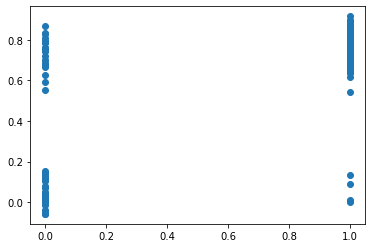

In [74]:
plt.scatter(y_test,pv)

In [75]:
residuals=y_test-pv

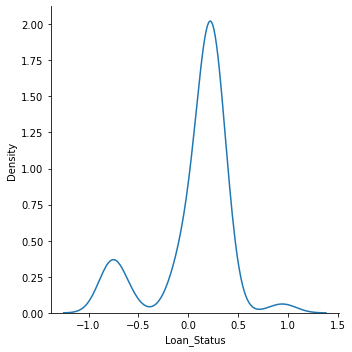

In [76]:
import seaborn as sns
sns.displot(residuals,kind='kde')

#### Checking MSE

In [77]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pv)

0.13676871282483688

#### r2 square and adjusted r2 

In [78]:
r2square=lr.score(X_test,y_test)

In [79]:
r2square

0.3065319708992529

In [80]:
y_test.shape

(185,)

In [81]:
X_test.shape[1]


6

In [82]:
# next i cheking adjusted r2 , always rember that adjusted r2< r2

In [83]:
adjr2=1-(1-r2square)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [84]:
adjr2

0.28315664407563224

In [85]:
#so in here also adjr2 < r2,so its good

**Pickle the model file for Deployment**

In [86]:
import pickle
with open('loanlr','wb')as file:
    pickle.dump(lr,file)